In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [2]:
# blinded instance
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def blinded_wiggle(x, p):
    norm  = p[0]
    life  = p[1]
    asym  = p[2]
    R     = p[3]
    phi   = p[4]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R) #blind version
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [3]:
params = [2.097 * 10**5,64.45,0.3857,0,-1.059,0.02,200,2.599,0.00]#-0.07523]
#N, tau, A, R, phi, A1CBO, tauCBO, omegaCBO, phiCBO

np.random.seed(123456789)
wiggleMcVec = []
nPos = 1.4 * 10**4
nPosCalo = int(np.ceil(nPos/24))
for calo in range(1,25):
    for i in range(nPosCalo):
        time = np.random.uniform(0,700)
        ding = blinded_wiggle([time],params[:5])
        wiggleMcVec.append((time,ding,calo))

In [4]:
timeVec, wiggleVec, caloVec = zip(*wiggleMcVec)
data = pandas.DataFrame({'time':timeVec, 'wiggle':wiggleVec, 'calo':caloVec})

In [5]:
data.describe()

,time,wiggle,calo
count,14016.000000,14016.000000,14016.000000
mean,350.407626,19251.930465,12.500000
std,202.609618,42360.690551,6.922434
min,0.009385,2.505819,1.000000
25%,173.395287,58.564824,6.750000
50%,350.820172,865.930309,12.500000
75%,523.661108,13770.010268,18.250000
max,699.922430,277770.240274,24.000000


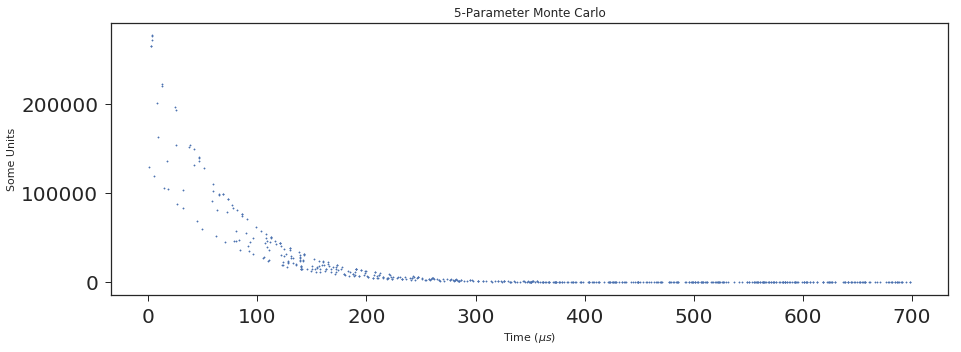

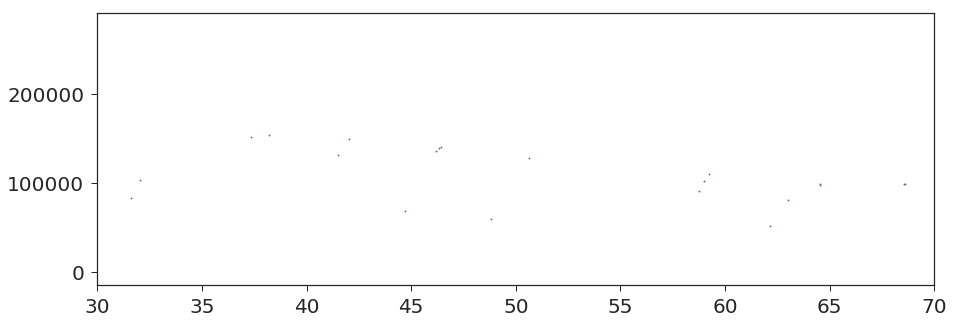

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(x=data['time'].loc[data['calo']==1],y=data['wiggle'].loc[data['calo']==1],s=2)
plt.xlabel('Time ($\mu s$)')
plt.ylabel('Some Units')
plt.title('5-Parameter Monte Carlo')
plt.show()

fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(x=data['time'].loc[data['calo']==1],y=data['wiggle'].loc[data['calo']==1],s=2)
plt.xlim(30,70)
plt.show()

In [7]:
def blinded_wiggle_cbo(x, p):
    norm     = p[0]
    life     = p[1]
    asym     = p[2]
    R        = p[3]
    phi      = p[4]
    A1       = p[5]
    lifeCBO  = p[6]
    omegaCBO = p[7]
    phiCBO1  = p[8]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
    
    cCBO = 1 - math.exp(-time/lifeCBO)*A1*math.cos(omegaCBO*time + phiCBO1)
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi)) * cCBO

In [8]:
np.random.seed(123456789)
wiggleMcVecCBO = []
params8init = 0
for calo in range(1,25):
    params[8] = params8init+(np.deg2rad(15))*(calo-1)
    for i in range(nPosCalo):
        time = np.random.uniform(0,700)
        ding = blinded_wiggle_cbo([time],params)
        wiggleMcVecCBO.append((time,ding,calo))

In [9]:
timeVecCBO, wiggleVecCBO, caloVecCBO = zip(*wiggleMcVecCBO)
dataCBO = pandas.DataFrame({'time':timeVecCBO, 'wiggle':wiggleVecCBO, 'calo':caloVecCBO})
dataCBO.head()

,time,wiggle,calo
0,372.983117,690.694992,1
1,373.895621,879.509762,1
2,356.687125,1137.259195,1
3,499.494822,93.453128,1
4,179.899268,8161.570535,1


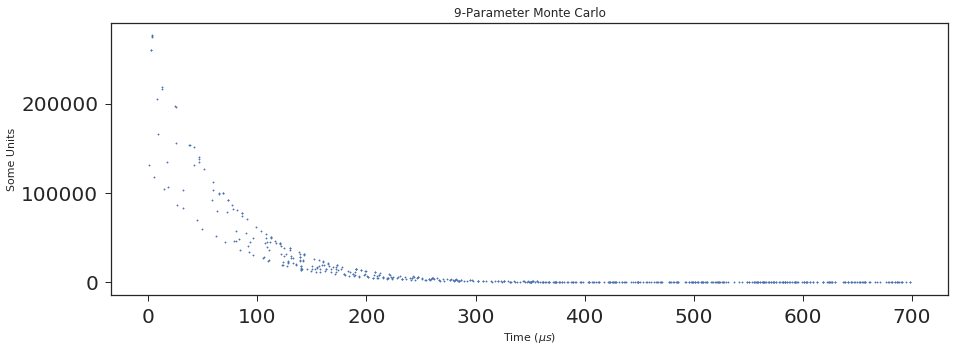

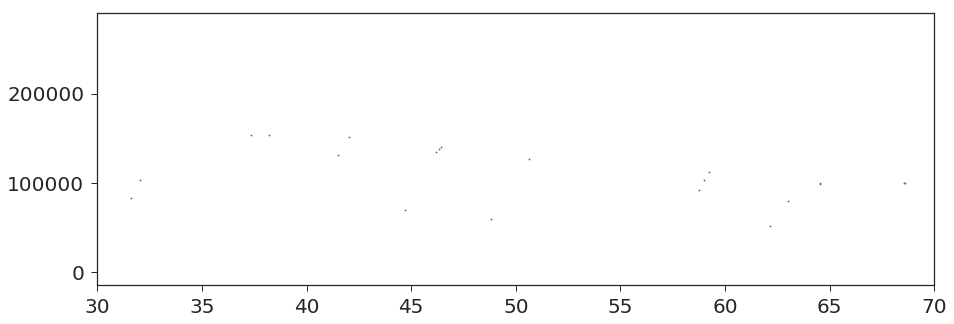

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(x=dataCBO['time'].loc[dataCBO['calo']==1],y=dataCBO['wiggle'].loc[dataCBO['calo']==1],s=2)
plt.xlabel('Time ($\mu s$)')
plt.ylabel('Some Units')
plt.title('9-Parameter Monte Carlo')
plt.show()

fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(x=dataCBO['time'].loc[dataCBO['calo']==1],y=dataCBO['wiggle'].loc[dataCBO['calo']==1],s=2)
plt.xlim(30,70)
plt.show()

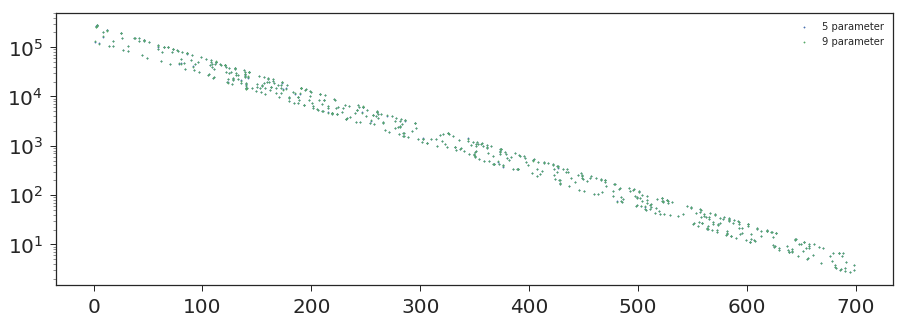

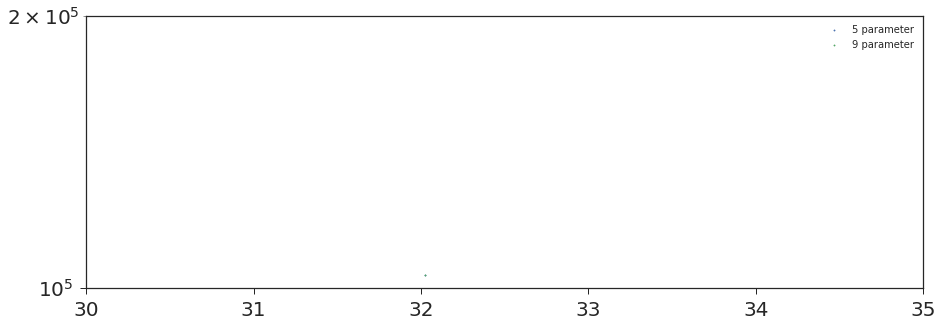

In [11]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(x=data['time'].loc[data['calo']==1],y=data['wiggle'].loc[data['calo']==1],s=2,label='5 parameter')
plt.scatter(x=dataCBO['time'].loc[dataCBO['calo']==1],y=dataCBO['wiggle'].loc[dataCBO['calo']==1],s=2,label='9 parameter')
plt.yscale('log')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(x=data['time'].loc[data['calo']==1],y=data['wiggle'].loc[data['calo']==1],s=2,label='5 parameter')
plt.scatter(x=dataCBO['time'].loc[dataCBO['calo']==1],y=dataCBO['wiggle'].loc[dataCBO['calo']==1],s=2,label='9 parameter')
plt.xlim(30,35)
plt.ylim(100000,200000)
plt.yscale('log')
plt.legend()
plt.show()

In [12]:
'''fig, ax = plt.subplots(figsize=(15, 5))
for calo in range(1,25):
for calo in range(1,5):
    plt.scatter(x=dataCBO['time'].loc[dataCBO['calo']==calo],y=dataCBO['wiggle'].loc[dataCBO['calo']==calo]
                ,s=2,label='9 parameter (calo'+str(calo)+')')
plt.xlim(30,35)
plt.ylim(100000,200000)
plt.yscale('log')
plt.legend()
plt.show()'''

"fig, ax = plt.subplots(figsize=(15, 5))\nfor calo in range(1,25):\nfor calo in range(1,5):\n    plt.scatter(x=dataCBO['time'].loc[dataCBO['calo']==calo],y=dataCBO['wiggle'].loc[dataCBO['calo']==calo]\n                ,s=2,label='9 parameter (calo'+str(calo)+')')\nplt.xlim(30,35)\nplt.ylim(100000,200000)\nplt.yscale('log')\nplt.legend()\nplt.show()"

In [13]:
func = r.TF1("func", blinded_wiggle_cbo, 30,350,9)
func.SetParNames('N','#tau','A','R','#phi','A_{CBO}','#tau_{CBO}','#omega_{CBO}','#phi_{CBO}')
func.SetParameters(2.097 * 10**5,64.45,0.3857,0,-1.059,0.02,200,2.599,0)#-0.07523)
func.SetParLimits(5,0,1)
func.SetParLimits(6,190,210)
func.SetParLimits(8,-0.001,2*math.pi)
func.SetLineColor(2)
func.SetNpx(1000)

Starting Calo 1
    Drawing
    Fitting
[209700.0, 64.45, 0.3857, 0.0, -1.059, 0.020000000000000018, 200.0, 2.599, 4.336808689942018e-17] [1.1137232767582747e-12, 2.4133747356815756e-16, 3.3133420043635604e-18, 1.829054667773747e-13, 2.6480240509937492e-17, 9.085914102277739e-18, 2.612369087963003e-13, 7.550096611875815e-18, 5.398952395951053e-16]
Starting Calo 2
    Drawing
    Fitting
[209700.00000041907, 64.45000000192316, 0.3856999999638746, 1.7784647058906528e-07, -1.0589999999909003, 0.02000000009111369, 199.99999641304527, 2.5990000000745757, 0.2617993825274384] [1.8984231442862957e-06, 4.831875246885591e-10, 5.357362965602438e-12, 2.833116665859849e-07, 3.1303764892137205e-11, 2.0912845081736734e-11, 6.128436709197551e-07, 1.3713718179678162e-11, 8.745197665967095e-10]
Starting Calo 3
    Drawing
    Fitting
[209700.00012606732, 64.45000002374987, 0.3856999995073912, -1.3921863842716398e-05, -1.0589999984759955, 0.02000000108755523, 199.9999440953113, 2.5990000014096664, 0.5235

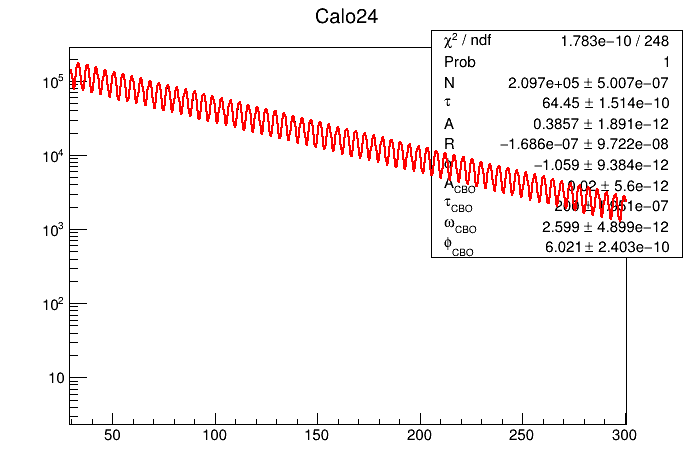

In [14]:
paramVec = []
paramErrVec = []
for calo in range(1,25):
    print("Starting Calo",calo)
    tempdf  = dataCBO.loc[dataCBO['calo'] == calo]
    timeVecCBO = tempdf['time'].values
    wiggleVecCBO = tempdf['wiggle'].values
    c = r.TCanvas()
    print("    Drawing")
    gr = r.TGraph(len(timeVecCBO), timeVecCBO, wiggleVecCBO)
    gr.SetTitle("Calo"+str(calo))
    gr.Draw("ap")
    gr.GetXaxis().SetRangeUser(30,300)
        
    print("    Fitting")
    gr.Fit('func','R')
    func.Draw("same")
    
    ding = func.GetParameters()
    ding2 = func.GetParErrors()
    paramsFit = []
    paramsErrFit = []
    for i in range(len(params)):
        paramsFit.append(ding[i])
        paramsErrFit.append(ding2[i])
    print(paramsFit,paramsErrFit)
    paramVec.append(paramsFit)
    paramErrVec.append(paramsErrFit)
    
    c.SetLogy()
#    c.Print("./images/CBO/CBO_Sim_Calo"+str(calo).zfill(2)+".png")
    c.Draw()

In [15]:
print(paramVec)
print(paramErrVec)
print(paramVec[0][8],paramVec[1][8])

[[209700.0, 64.45, 0.3857, 0.0, -1.059, 0.020000000000000018, 200.0, 2.599, 4.336808689942018e-17], [209700.00000041907, 64.45000000192316, 0.3856999999638746, 1.7784647058906528e-07, -1.0589999999909003, 0.02000000009111369, 199.99999641304527, 2.5990000000745757, 0.2617993825274384], [209700.00012606732, 64.45000002374987, 0.3856999995073912, -1.3921863842716398e-05, -1.0589999984759955, 0.02000000108755523, 199.9999440953113, 2.5990000014096664, 0.5235987153785633], [209700.00000004517, 64.45000000001136, 0.3857000000003651, -9.519828404966628e-08, -1.0589999999920474, 0.02000000000713975, 199.9999997007396, 2.598999999956176, 0.7853981658484366], [209700.00000088266, 64.44999999989139, 0.38570000000080756, 1.4452080818964236e-07, -1.059000000018296, 0.020000000013867314, 199.9999988186367, 2.5989999999980906, 1.0471975512541178], [209700.00002104187, 64.44999999626334, 0.38569999993235987, -7.42823588745413e-07, -1.0589999997675514, 0.019999999890948583, 200.0000005288849, 2.599000

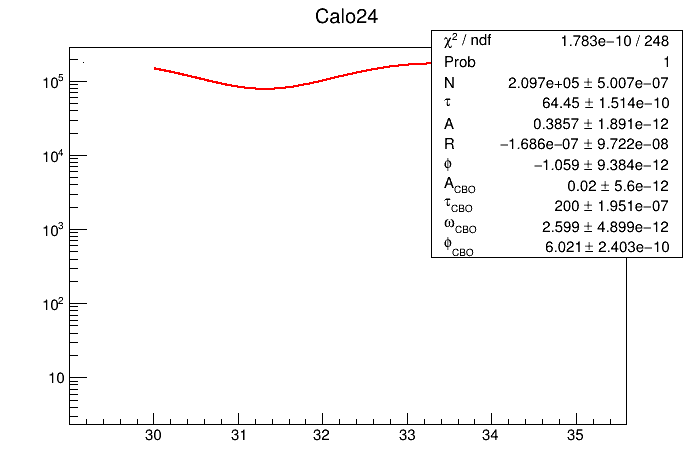

In [16]:
gr.Draw("ap")
gr.GetXaxis().SetRangeUser(30,35)
c.Draw()

1 1.3624486320346218e-16 4.336808689942018e-17 4.336808689942018e-17
2 0.8224670168625446 0.26179938252743845 0.2617993825274384
3 2.4674008945248924 0.7853980979060018 0.5235987153785633
4 4.934802002497238 1.5707962637544384 0.7853981658484366
5 1.941484829194809 2.617993815008556 1.0471975512541178
6 6.053819986836418 3.9269907509870574 1.3089969359785016
7 4.705436966040672 5.497787105105408 1.5707963541183503
8 4.179520803162523 7.330382791157448 1.8325956860520407
9 4.476071750481634 9.42477788944629 2.094395098288841
10 5.595089710091926 11.78097236880746 2.3561944793611693
11 1.2533893907323643 14.39896623430799 2.6179938655005306
12 4.017341466080976 17.278759504829658 2.879793270521667
13 1.3205752874917012 20.42035216945861 3.1415926646289507
14 5.729461371013666 23.823744196901785 3.403392027443177
15 4.677629220725809 27.488935624859206 3.665191427957421
16 4.448264105070782 31.415926441000522 3.9269908161413167
17 5.041366007173517 35.60471663995423 4.188790198953708
18 0

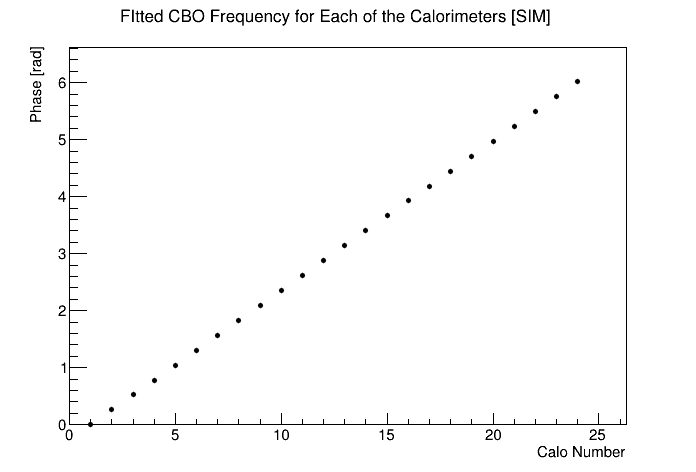

In [17]:
grCBO = r.TGraph()
cboSUM = 0
for calo in range(1,25):
    cboCaloi = paramVec[calo-1][8]
    cboSUM = cboSUM + cboCaloi
    print(calo, cboSUM % 2*math.pi, cboSUM, cboCaloi)
    grCBO.SetPoint(calo-1,calo,cboCaloi)
c=r.TCanvas() 
grCBO.SetTitle("FItted CBO Frequency for Each of the Calorimeters [SIM]")
grCBO.GetXaxis().SetTitle("Calo Number")
grCBO.GetYaxis().SetTitle("Phase [rad]")
grCBO.SetMarkerStyle(20)
grCBO.SetMarkerSize(.5)
grCBO.Draw("ap")
c.Draw()

In [18]:
print((cboSUM ))
print((cboSUM % 2*math.pi),"mod 2 pi")
print((cboSUM % 2*math.pi)/math.pi,"pi")

72.25663082949362
0.8062295286218 mod 2 pi
0.2566308294936164 pi


Starting All Calos
    Drawing
    Fitting
[209456.1556676449, 64.4768653050332, 0.3855802314815778, -9.939549832394851, -1.0583815540260788, 0.001108106104458273, 190.00000000015376, 2.59827064680424, 6.283185307143918] [59.11450332032382, 0.016508430692092735, 0.00019776825422123225, 10.394803867117314, 0.0010467253765659205, 0.0002511756020852636, 0.433695944527288, 0.004191573095214234, 0.0005022003128541185]

****************************************
Minimizer is Minuit / MigradImproved
Chi2                      =  1.25257e+09
NDf                       =         6369
Edm                       =   0.00296657
NCalls                    =          863
N                         =       209456   +/-   59.1145     
#tau                      =      64.4769   +/-   0.0165084   
A                         =      0.38558   +/-   0.000197768 
R                         =     -9.93955   +/-   10.3948     
#phi                      =     -1.05838   +/-   0.00104673  
A_{CBO}                   =   

Info in <TCanvas::Print>: png file ./images/CBO/CBO_Sim_Calo_All.png has been created


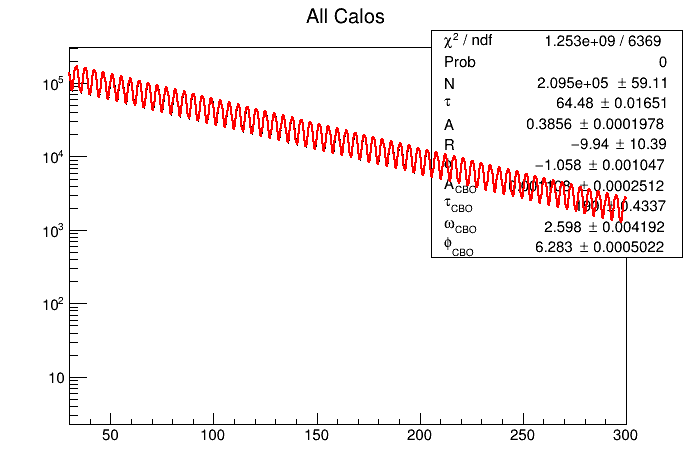

In [19]:
print("Starting All Calos")
tempdf  = dataCBO
timeVecCBO = tempdf['time'].values
wiggleVecCBO = tempdf['wiggle'].values
c = r.TCanvas()
print("    Drawing")
gr = r.TGraph(len(timeVecCBO), timeVecCBO, wiggleVecCBO)
gr.SetTitle("All Calos")
gr.Draw("ap")
gr.GetXaxis().SetRangeUser(30,300)

print("    Fitting")
gr.Fit('func','REM')
func.Draw("same")

ding = func.GetParameters()
ding2 = func.GetParErrors()
paramsFit = []
paramsErrFit = []
for i in range(len(params)):
    paramsFit.append(ding[i])
    paramsErrFit.append(ding2[i])
print(paramsFit,paramsErrFit)

c.SetLogy()
c.Print("./images/CBO/CBO_Sim_Calo_All.png")
c.Draw()

In [ ]:
print((paramsFit[8] ))
print((paramsFit[8] % (2*math.pi)),"mod 2 pi")
print((paramsFit[8] % (2*math.pi))/math.pi,"pi")

Now lets try creating/fittinghistograms instead of the tgraphs, because I'm out of ideas

Starting Calo 1
    Filling
    Projecting (all of my issues)
    Fitting
[209456.1556676449, 64.4768653050332, 0.3855802314815778, -9.939549832394851, -1.0583815540260788, 0.001108106104458273, 190.00000000015376, 2.59827064680424, 6.283185307143918] [59.11450332032382, 0.016508430692092735, 0.00019776825422123225, 10.394803867117314, 0.0010467253765659205, 0.0002511756020852636, 0.433695944527288, 0.004191573095214234, 0.0005022003128541185]
    Drawing
Starting Calo 2
    Filling
    Projecting (all of my issues)
    Fitting
[209456.1556676449, 64.4768653050332, 0.3855802314815778, -9.939549832394851, -1.0583815540260788, 0.001108106104458273, 190.00000000015376, 2.59827064680424, 6.283185307143918] [59.11450332032382, 0.016508430692092735, 0.00019776825422123225, 10.394803867117314, 0.0010467253765659205, 0.0002511756020852636, 0.433695944527288, 0.004191573095214234, 0.0005022003128541185]
    Drawing
Starting Calo 3
    Filling
    Projecting (all of my issues)
    Fitting
[20945

Warning in <Fit>: Fit data is empty 
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 


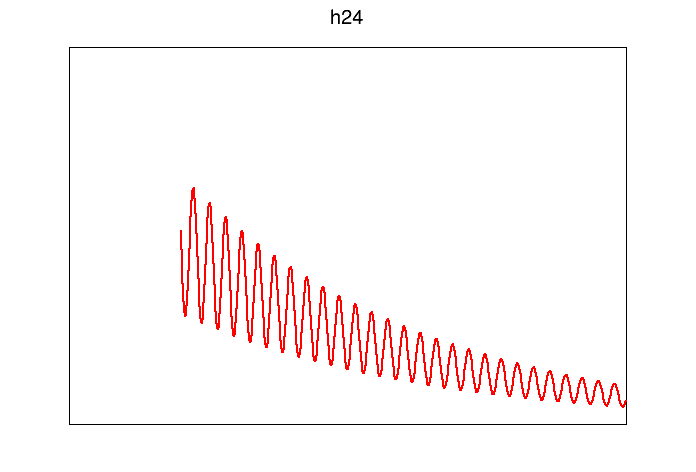

In [21]:
paramVec = []
paramErrVec = []
histVec = []

for calo in range(1,25):
    print("Starting Calo",calo)
    tempdf  = dataCBO.loc[dataCBO['calo'] == calo]
    timeVecCBO = tempdf['time'].values
    wiggleVecCBO = tempdf['wiggle'].values
    c = r.TCanvas()
    print("    Filling")
    #create/fill a TH2 and then project onto the x-axis
    h1 = r.TH2D("h1","h"+str(calo),700000,0,700,3000,0,1000000)
    for i in range(len(timeVecCBO)):
        h1.Fill(timeVecCBO[i], wiggleVecCBO[i])

    print("    Projecting (all of my issues)")
    h2 = h1.ProfileX()
    h2.GetXaxis().SetRangeUser(0,150)
    
    print("    Fitting")
    h2.Fit('func','R')
    h2.Draw()
    func.Draw("SAME")
    
    ding = func.GetParameters()
    ding2 = func.GetParErrors()
    paramsFit = []
    paramsErrFit = []
    for i in range(len(params)):
        paramsFit.append(ding[i])
        paramsErrFit.append(ding2[i])
    print(paramsFit,paramsErrFit)
    paramVec.append(paramsFit)
    paramErrVec.append(paramsErrFit)
    
    print("    Drawing")
    c.Draw()
    
    histVec.append( h2.Clone("h"+str(calo)) )
    
    h1.Delete()
    h2.Delete()
    
#    c.Print("./images/CBO/CBO_Sim_Calo"+str(calo).zfill(2)+".png")

[<ROOT.TProfile object ("h1") at 0x7fffcae7a250>, <ROOT.TProfile object ("h2") at 0x7fffcae64cb0>, <ROOT.TProfile object ("h3") at 0x7fffcac880f0>, <ROOT.TProfile object ("h4") at 0x7fffcae6aee0>, <ROOT.TProfile object ("h5") at 0x7fffcaec77b0>, <ROOT.TProfile object ("h6") at 0x7fffcaecc590>, <ROOT.TProfile object ("h7") at 0x7fffca6e75b0>, <ROOT.TProfile object ("h8") at 0x7fffcaebf090>, <ROOT.TProfile object ("h9") at 0x7fffcae6f530>, <ROOT.TProfile object ("h10") at 0x7fffcaeb2d00>, <ROOT.TProfile object ("h11") at 0x7fffcaee71f0>, <ROOT.TProfile object ("h12") at 0x7fffcaec9240>, <ROOT.TProfile object ("h13") at 0x7fffcae96410>, <ROOT.TProfile object ("h14") at 0x7fffcaeadf10>, <ROOT.TProfile object ("h15") at 0x7fffca6e6d00>, <ROOT.TProfile object ("h16") at 0x7fffcae87260>, <ROOT.TProfile object ("h17") at 0x7fffcae77050>, <ROOT.TProfile object ("h18") at 0x7fffcaed6790>, <ROOT.TProfile object ("h19") at 0x7fffcaeca410>, <ROOT.TProfile object ("h20") at 0x7fffcaeca860>, <ROOT.TP

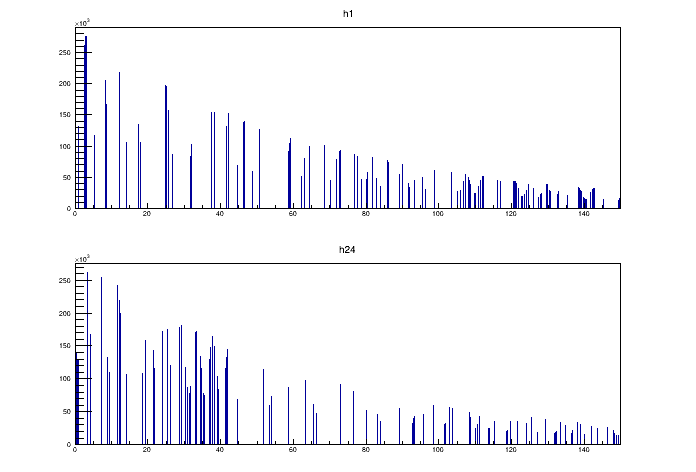

In [22]:
print(histVec)
c2 = r.TCanvas()
c2.Divide(1,2)
c2.cd(1)
histVec[0].Draw()
c2.cd(2)
histVec[23].Draw()
c2.Draw()

In [23]:
hTotal = histVec[0].Clone("hTotal")
(hTotal.GetFunction("func")).Delete()
hTotal.SetTitle("hTotal")

for i,hist in enumerate(histVec):
    if i > 0:
        hTotal.Add(hist,1)
        
c3 = r.TCanvas()
hTotal.Draw()
c3.Draw()

ReferenceError: attempt to access a null-pointer

In [ ]:
c3 = r.TCanvas()
hTotal.Draw()
func.SetParameter(8,0)
hTotal.Fit("func","REMB V")
func.Draw("SAME")
c3.Draw()

In [ ]:
import csv

out = open('CBO_hist_byCalo_fitParams_2.csv','w')
csv_out = csv.writer(out)
func.SetParNames()
csv_out.writerow(['N','tau','A','R','phi','ACBO','tauCBO','omegaCBO','phiCBO'])
for i in range(len(paramVec)):
    csv_out.writerow(paramVec[i])
out.close()

In [ ]:
import csv

out = open('CBO_hist_byCalo_fitParams_err_2.csv','w')
csv_out = csv.writer(out)
func.SetParNames()
csv_out.writerow(['N','tau','A','R','phi','ACBO','tauCBO','omegaCBO','phiCBO'])
for i in range(len(paramErrVec)):
    csv_out.writerow(paramErrVec[i])
out.close()

In [ ]:
print("hi")